# Loading the minst data


In [3]:

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [4]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

# Exploring the data

In [5]:
X, y = mnist.data, mnist.target


In [6]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
X.shape

(70000, 784)

In [8]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [9]:
y.shape

(70000,)

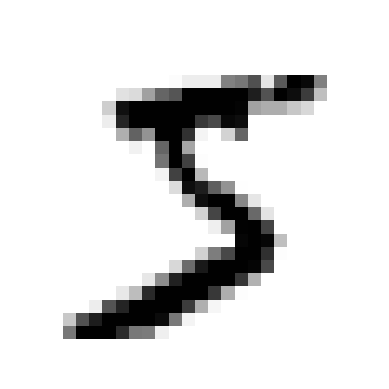

'5'

In [10]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

y[0]

In [11]:
y[0]

'5'

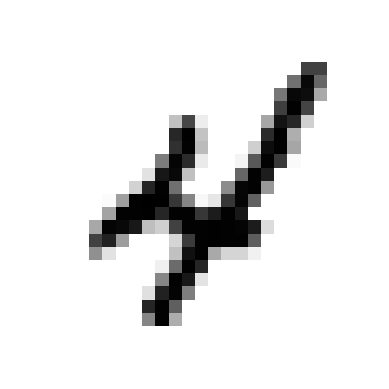

'4'

In [12]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[9]
plot_digit(some_digit)
plt.show()

y[9]

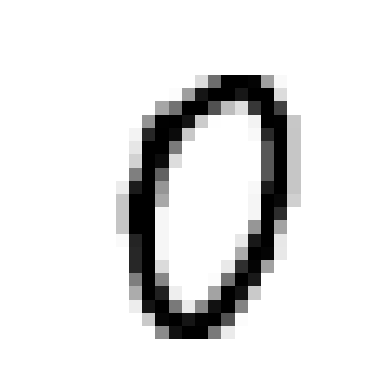

'0'

In [13]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[1000]
plot_digit(some_digit)
plt.show()

y[1000]



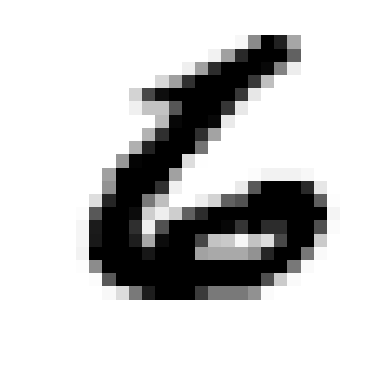

'6'

In [14]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[-1]
plot_digit(some_digit)
plt.show()

y[-1]

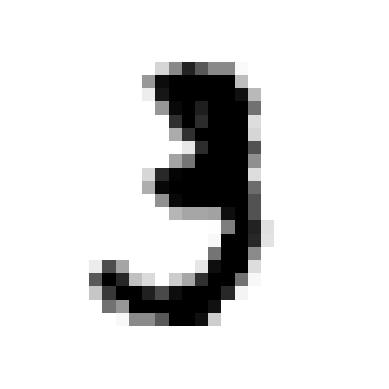

'3'

In [15]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[10]
plot_digit(some_digit)
plt.show()

y[10]

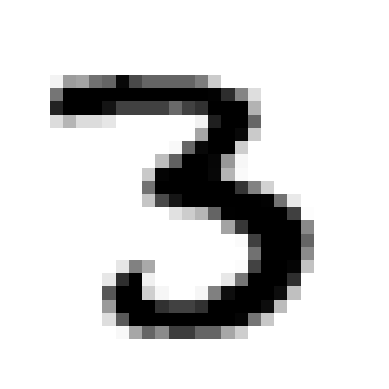

'3'

In [16]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[12]
plot_digit(some_digit)
plt.show()

y[12]

### Splitting the data

In [17]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier

Let's now create  a 3-detector which only classifies 3 or not 3

In [18]:
y_train_3 = (y_train == '3')  # True for all 3s, False for all other digits
y_test_3 = (y_test == '3')

Let's start with stochastic gradient descent (SGD, or stochastic GD) classifier.

In [19]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_3)

SGDClassifier(random_state=42)

Making some predictions

In [20]:
sgd_clf.predict([X[12]])

array([ True])

In [21]:
sgd_clf.predict([X[1000]])

array([False])

In [22]:
sgd_clf.predict([X[10]])

array([ True])

In [23]:
sgd_clf.predict([X[222]])

array([False])

The classifier guesses that 2 images represents a 3 (True) while the other donot represent 3 (False). Looks like it
guessed right in these particular cases! Now, let’s evaluate this model’s
performance.

# Performance Measures

## Measuring Accuracy Using Cross-Validation

In [24]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.9496 , 0.9624 , 0.96275])

Well, it seems our 3-detector is doing very good fro the above accuracy, let's confirm that if the system really learns using a dummy classifier.

DummyClassifier is a simple baseline model that makes predictions using simple rules,
such as always predicting the most frequent class. It's useful for comparing performance
with more advanced classifiers to ensure your model is actually learning something meaningful.


In [25]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_3)
print(any(dummy_clf.predict(X_train)))

False


Well, it turns out the dummyClassifier isn't able to identify  any '3', but let's check the accuracy.

In [26]:
cross_val_score(dummy_clf, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.89785, 0.8978 , 0.8978 ])

Woooow 😂 it cant even identify a single '3' but it has a cross val accuracy of almost 90% 👀

let's dive into  what happened

Turns out accuracy can be misleading when classes are imbalanced.
For example, if only 10% of images are 3s, always guessing "not 3" gives 90% accuracy — but it's useless.
Instead, we should use a confusion matrix to see how well the classifier handles each class.


## Confusion Matrix

A confusion matrix is a table that shows how well a classification model performs, by comparing the actual labels to the predicted labels.

In [27]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3)

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_3, y_train_pred)
cm

array([[53477,   392],
       [ 2113,  4018]], dtype=int64)

In [29]:
y_train_perfect_predictions = y_train_3  # pretend we reached perfection to better see how confusion matrix work
confusion_matrix(y_train_3, y_train_perfect_predictions)

array([[53869,     0],
       [    0,  6131]], dtype=int64)

## Precision and Recall

* **Precision**: The proportion of true positive results among all positive predictions. It answers, "Of all the items predicted as positive, how many were actually positive?"

* **Recall**: The proportion of true positive results among all actual positives. It answers, "Of all the actual positive items, how many did we correctly identify?"

* **F1 Score**: The harmonic mean of precision and recall. It balances both metrics, providing a single value to optimize when you care about both false positives and false negatives.


In [30]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_3, y_train_pred)  # == 4018 / (392 + 4018)

# extra code – this cell also computes the precision: TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.9111111111111111

In [31]:
recall_score(y_train_3, y_train_pred)

# extra code – this cell also computes the recall: TP / (FN + TP)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.655358016636764

In [32]:
from sklearn.metrics import f1_score

f1_score(y_train_3, y_train_pred)

# extra code – this cell also computes the f1 score
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7623565126648325

## Precision/Recall Trade-off

In [33]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([6800.90947939])

In [34]:
some_digit = X[12]

y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([6800.90947939])

In [35]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [36]:
y_some_digit_pred

array([ True])

In [37]:
threshold = 7000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [38]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3,
                             method="decision_function")

In [39]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_scores)

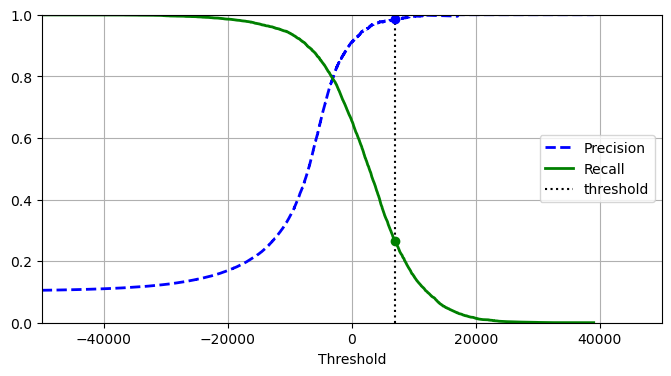

In [40]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

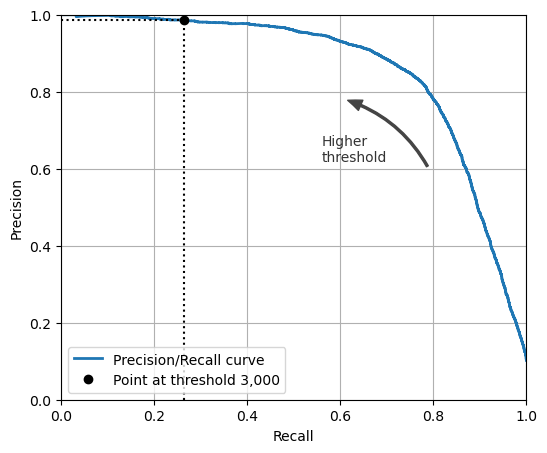

In [41]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [42]:
idx_for_95_precision = (precisions >= 0.95).argmax()
threshold_for_95_precision = thresholds[idx_for_95_precision]
threshold_for_95_precision

2081.553214151017

In [43]:
y_train_pred_95 = (y_scores >= threshold_for_95_precision)

In [44]:
precision_score(y_train_3, y_train_pred_95)

0.9500717360114778

In [45]:
recall_at_95_precision = recall_score(y_train_3, y_train_pred_95)
recall_at_95_precision

0.5400424074376121

## The ROC Curve

In [46]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_3, y_scores)

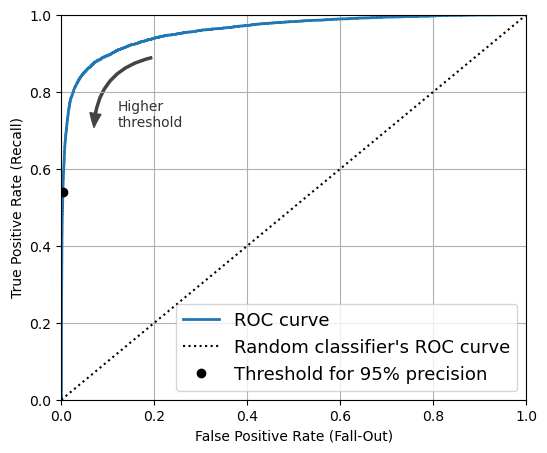

In [47]:
idx_for_threshold_at_95 = (thresholds <= threshold_for_95_precision).argmax()
tpr_95, fpr_95 = tpr[idx_for_threshold_at_95], fpr[idx_for_threshold_at_95]

plt.figure(figsize=(6, 5))  # extra code – not needed, just ?
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_95], [tpr_95], "ko", label="Threshold for 95% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

In [48]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_3, y_scores)

0.9599243001892759

Let’s now create a RandomForestClassifier, whose PR curve and F score we
can compare to those of the SGDClassifier:


In [49]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [50]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_3, cv=3,
                                    method="predict_proba")

In [51]:
y_probas_forest[:2]

array([[0.62, 0.38],
       [1.  , 0.  ]])

In [52]:
y_train_3[:2]

array([False, False])

In [53]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_3, y_scores_forest)

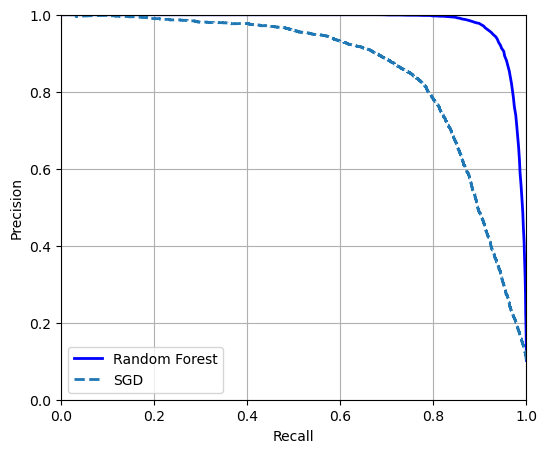

In [54]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

We could use `cross_val_predict(forest_clf, X_train, y_train_3, cv=3)` to compute `y_train_pred_forest`, but since we already have the estimated probabilities, we can just use the default threshold of 50% probability to get the same predictions much faster:

In [55]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%
f1_score(y_train_3, y_train_pred_forest)

0.9105216622458002

In [56]:
roc_auc_score(y_train_3, y_scores_forest)

0.995864544068936

In [57]:
precision_score(y_train_3, y_train_pred_forest)

0.9942073759413014

In [58]:
recall_score(y_train_3, y_train_pred_forest)

0.8398303702495514

# Multiclass Classification

There many types of multi classification strategies, they include:
 1. **Native Multiclass Classification**
Some classifiers like `LogisticRegression`, `RandomForestClassifier`, and `GaussianNB` can handle multiclass tasks directly without needing any special strategy.

2. **One-vs-Rest (OvR) / One-vs-All (OvA)**
Train one binary classifier per class to distinguish that class vs. all others.

- For 10 classes (e.g., MNIST), train 10 classifiers.

- During prediction: run all classifiers and choose the one with the highest score.

- Preferred when training binary classifiers is efficient.

3. **One-vs-One (OvO)**
- Train a binary classifier for every possible pair of classes.

- For 10 classes: 10 × (10 – 1) / 2 = 45 classifiers.

- During prediction: each classifier votes, and the class with the most wins is selected.

- Preferred when training on large datasets is slow, like with SVMs.

 **Scikit-Learn Behavior :**
Scikit-Learn automatically chooses OvR or OvO based on the algorithm you're using.

As stated earlier, when using a binary classification algorithm like `sklearn.svm.SVC` on a multiclass dataset (such as MNIST with digits 0 to 9), Scikit-Learn automatically detects the multiclass setting and applies the **One-vs-One (OvO)** strategy. This means it internally trains one binary classifier for every possible pair of classes—resulting in 45 classifiers for 10 classes. Each classifier distinguishes between two classes, and during prediction, each one votes for a class; the class with the most votes is selected as the final prediction. In the below exercise, only the first 2,000 training images are used to reduce computation time, since SVMs are slow to train on large datasets.


In [59]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])  # y_train, not y_train_5 this time

SVC(random_state=42)

Let's now make a prediction

In [60]:
some_digit = X[1000]
svm_clf.predict([some_digit])

array(['0'], dtype=object)

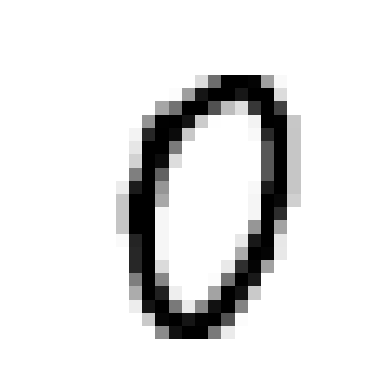

In [62]:
plot_digit(some_digit)

Yay! The prediction is correct, In this One-vs-One (OvO) approach used by `SVC`, the model makes 45 predictions—one for each pair of classes—and selects the class that wins the most pairwise comparisons. The `decision_function()` returns 10 scores per instance, where each score reflects how many duels a class won, with small adjustments (up to ±0.33) to break ties based on classifier confidence.


In [63]:
some_digit_scores = svm_clf.decision_function([some_digit])


In [64]:
some_digit_scores.round(2)


array([[ 9.3 , -0.3 ,  1.77,  2.79,  2.75,  8.29,  4.86,  1.75,  7.2 ,
         6.24]])

The highest score is 8.29, and it’s indeed the one corresponding to class 0:


In [65]:
class_id = some_digit_scores.argmax()

class_id

0

When a classifier is trained in Scikit-Learn, it stores the sorted list of class labels in its `classes_` attribute. This array maps prediction indices to actual class labels. For MNIST, the class labels (e.g., '0' to '9') happen to align with their indices, but this isn’t guaranteed in general. To retrieve the actual class label for a prediction, you should use the class index like `svm_clf.classes_[class_id]`.


In [66]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [67]:
svm_clf.classes_[class_id]

'0'

If you want `decision_function()` to return all 45 scores, you can set the `decision_function_shape` hyperparameter to `"ovo"`. The default value is `"ovr"`, but don't let this confuse you: `SVC` always uses OvO for training. This hyperparameter only affects whether or not the 45 scores get aggregated or not:

In [68]:
#shows how to get all 45 OvO scores if needed
svm_clf.decision_function_shape = "ovo"
some_digit_scores_ovo = svm_clf.decision_function([some_digit])
some_digit_scores_ovo.round(2)

array([[ 1.29,  1.11,  1.28,  1.  ,  1.  ,  1.04,  1.  ,  1.  ,  1.  ,
        -1.07, -1.24, -0.61, -1.5 , -0.85, -0.7 , -1.44, -1.22,  0.18,
        -0.18, -0.75, -0.28, -0.02, -0.48, -0.8 ,  0.26, -1.4 , -0.12,
         0.2 , -0.28, -0.22, -1.  , -0.19,  0.16, -0.57, -0.89,  0.63,
         0.81,  1.13,  0.72,  0.17, -0.3 , -0.39, -0.47, -0.77,  0.07]])

You can manually choose the multiclass strategy in Scikit-Learn by using `OneVsOneClassifier` for One-vs-One or `OneVsRestClassifier` for One-vs-Rest. Just wrap your desired classifier (even if it's not binary) in one of these classes before training. For example, wrapping `SVC` with `OneVsRestClassifier` forces it to use the OvR strategy instead of its default OvO.


In [69]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

Let’s make a prediction, and check the number of trained classifiers:

In [70]:
ovr_clf.predict([some_digit])

array(['0'], dtype='<U1')

In [71]:
# The expression len(ovr_clf.estimators_) returns the number of binary classifiers trained inside the OneVsRestClassifier.
len(ovr_clf.estimators_)

10

Let's now train an SGDClassifier on a multiclass dataset and using it to make
predictions is, just as easy:


In [72]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['0'], dtype='<U1')

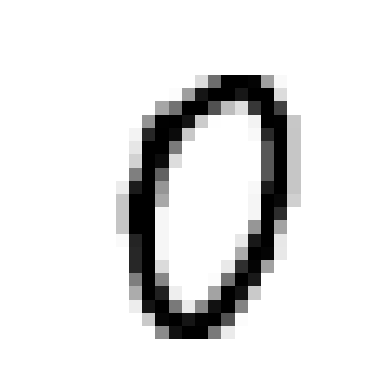

In [73]:
plot_digit(some_digit)

YAy! It accurately predicts the class.

In [75]:
some_digit_scores = sgd_clf.decision_function([some_digit]).round()

In [76]:
class_id = some_digit_scores.argmax()
class_id

0

In [77]:
sgd_clf.decision_function([some_digit]).round() 

array([[  1468., -41272.,  -3105.,  -7192., -11463.,  -4128., -20994.,
        -12695.,    128., -11496.]])

In [78]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

It gets over 85.8% on all test folds. If you used a random classifier, you
would get 10% accuracy, so this is not such a bad score, but I can still do
much better. Simply scaling the inputs increases
accuracy above:

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))

cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

Woow! Scaling really helps, we now have average acuracy of 89%-90% across 3 folds.

# Error Analysis

After finding a promising model (assuming `sgd_clf` is our promising), we can improve it by analyzing the errors it makes. One way to do this is by examining the **confusion matrix**, which shows how often each class is confused with others. Since confusion matrices for multiple classes can be large, visualizing it with `ConfusionMatrixDisplay.from_predictions()` makes it easier to interpret and analyze. This helps identify areas where the model can be improved.


**Warning:** the following cell will take a few minutes to run:

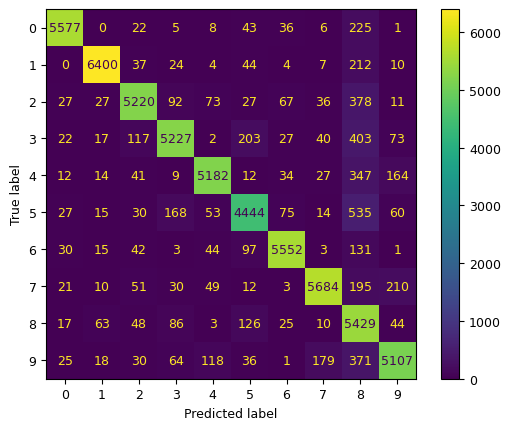

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
plt.rc('font', size=9)  # make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

The confusion matrix looks good, with most predictions falling on the main diagonal, indicating correct classifications. However, the darker cell at row 5, column 5 suggests more errors or fewer samples for class 5. To better understand such imbalances, it's helpful to **normalize** the confusion matrix by dividing each value by the total number of true instances in its row. This shows the **proportion of errors per class** and makes comparison fairer across classes. Setting `normalize="true"` and formatting values as percentages provides a clearer, more interpretable view of model performance.


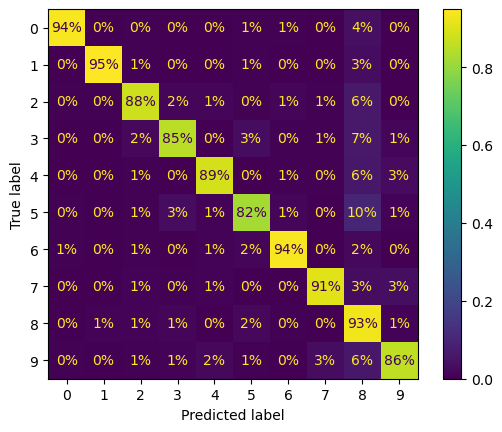

In [82]:
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()

Now we can easily see that only 82% of the images of 5s were classified
correctly. The most common error the model made with images of 5s was to
misclassify them as 8s: this happened for 10% of all 5s. But only 2% of 8s
got misclassified as 5s; confusion matrices are generally not symmetrical! If
you look carefully, you will notice that many digits have been misclassified
as 8s, but this is not immediately obvious from this diagram. If you want to
make the errors stand out more, you can try putting zero weight on the correct
predictions. 


The following code does just that.


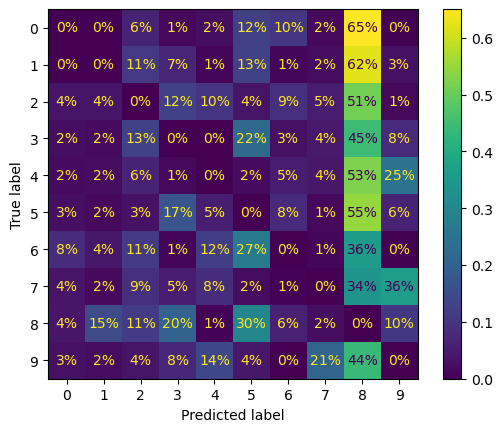

In [83]:
sample_weight = (y_train_pred != y_train)
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
plt.show()

By removing correct predictions from the confusion matrix, the visualization clearly highlights misclassification patterns. It reveals that **many images are wrongly predicted as 8s**, especially from other classes,this is the most frequent error. However, percentages in this view represent the proportion of a class's errors, **not** total misclassifications. For instance, 36% of errors on 7s are predictions of 9s, but only 3% of **all** 7s were misclassified that way. You can also normalize by **columns** (using `normalize="pred"`) to understand which actual classes contribute most to predictions of a given label. Overall, confusion matrix analysis can guide improvement, such as gathering more diverse training samples, engineering helpful features like loop-counting in digits, or applying image preprocessing to enhance distinguishing patterns.


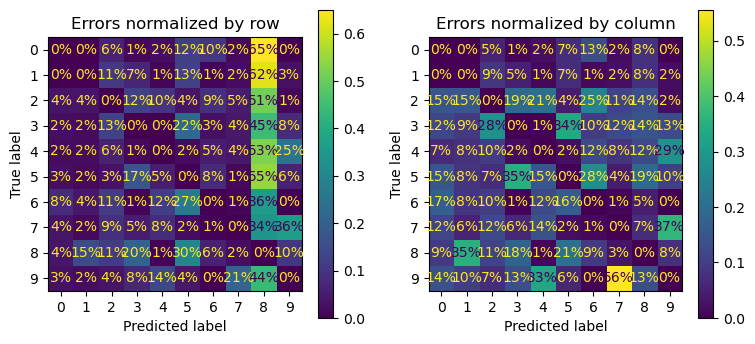

In [85]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
plt.show()
plt.rc('font', size=14)  # make fonts great again

Analyzing individual errors can also be a good way to gain insights into what
your classifier is doing and why it is failing. For example, let’s plot examples
of 3s and 5s in a confusion matrix style

In [86]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

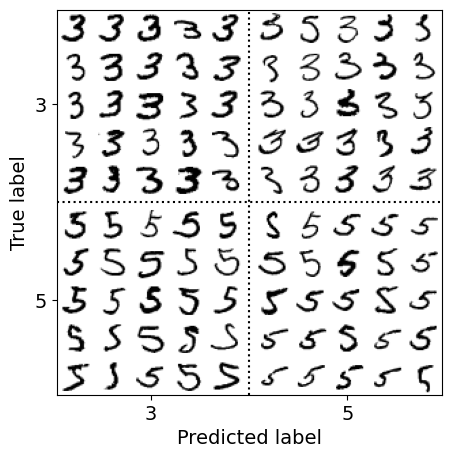

In [87]:
size = 5
pad = 0.2
plt.figure(figsize=(size, size))

for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
        
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

The classifier sometimes misclassifies digits like 3 and 5 because they can be written in very similar ways, and it’s using a simple linear model (SGDClassifier) that struggles with subtle differences. Even though humans can easily tell them apart, the classifier just assigns pixel weights and sums them, so it's sensitive to small shifts or rotations in the image. To improve performance, one solution is to preprocess the images to center and align them properly, but a more practical approach is **data augmentation**, expanding the training set with slightly rotated or shifted versions of the original images to make the model more robust to such variations.


# Multilabel Classification

**Multilabel classification** refers to a scenario where each instance can belong to **multiple classes at the same time**, unlike traditional classification where each instance is assigned to just one class. For example, in face recognition, a single photo might contain multiple known people. If the model is trained to recognize Alice, Bob, and Charlie, and the photo contains Alice and Charlie, the output could be `[True, False, True]`, meaning “Alice is present, Bob is not, Charlie is present.” Each label is a separate binary classification, and together they form a multilabel output.



Let us now try multilabel classification using the K-Nearest Neighbors (KNN) classifier. Unlike traditional classification, where each instance is assigned a single label, multilabel classification allows us to assign multiple binary labels to each instance. For example, we can label a digit image with two separate tags: one indicating whether the digit is large (7, 8, or 9), and another indicating whether it is odd. To implement this, we create two boolean label arrays, y_train_large for digits ≥ 7 and y_train_odd for odd digits.

In [88]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)


KNeighborsClassifier()

Now,
you can make a prediction, and notice that it outputs two labels:


In [89]:
knn_clf.predict([some_digit])

array([[False, False]])

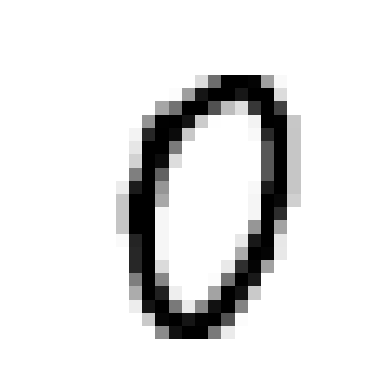

In [100]:
plot_digit(some_digit)

In [102]:

some_digit = X[10]
knn_clf.predict([some_digit])

array([[False,  True]])

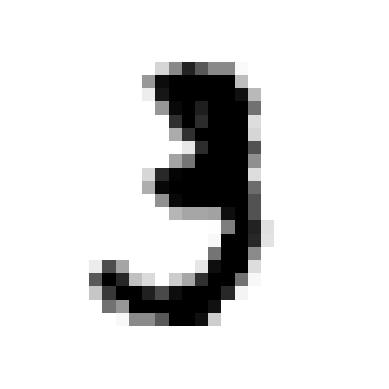

In [103]:
plot_digit(some_digit)

## Evaluating multilabel classifier

There are many ways to evaluate a multilabel classifier, and selecting the
right metric really depends on your project. One approach is to measure the
F score for each individual label (or any other binary classifier metric
discussed earlier), then simply compute the average score. The following
code computes the average F score across all labels:


In [104]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

The above approach assumes that all labels are equally important, which may not always
be the case. In particular, if you have many more pictures of Alice than of
Bob or Charlie, you may want to give more weight to the classifier’s score on
pictures of Alice. One simple option is to give each label a weight equal to its
support (i.e., the number of instances with that target label). To do this,
simply set average="weighted" when calling the f1_score() function.


In [105]:
#              shows that we get a negligible performance improvement when we
#              set average="weighted" because the classes are already pretty
#              well balanced.

f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

Some classifiers, like Support Vector Classifier (SVC), do not support multilabel classification out of the box. A basic workaround is to train one binary classifier per label. However, this approach fails to capture relationships between labels for example, recognizing that large digits (like 7, 8, 9) are more often odd. To address this, Scikit-Learn offers the `ClassifierChain` class, which links models in a sequence: each model uses not only the input features but also the predictions from earlier models in the chain. This allows the classifier to learn inter-label dependencies. When using the `cv` parameter, the chain uses cross-validation to get cleaner, out-of-sample predictions for training later models in the sequence, improving generalization.


In [106]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [107]:
chain_clf.predict([some_digit])

array([[0., 1.]])

# Multioutput classification

**Multioutput classification** is an advanced form of classification where a model predicts **multiple outputs**, and **each output can have more than two possible values**. For example, when cleaning a noisy image, the model predicts the intensity of every pixel (each treated as a label), and since pixel values range from 0 to 255, it becomes a **multioutput–multiclass task**. While this looks like classification, it's close to **regression** too, as it's predicting continuous-like values. This type of model is useful in complex tasks like image denoising, where multiple related outputs need to be predicted at once.


Let’s start by creating the training and test sets by taking the MNIST images
and adding noise to their pixel intensities with NumPy’s randint() function.
The target images will be the original images:

In [110]:
np.random.seed(42)  # to make this code example reproducible

# for the train set
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

# for the test set
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

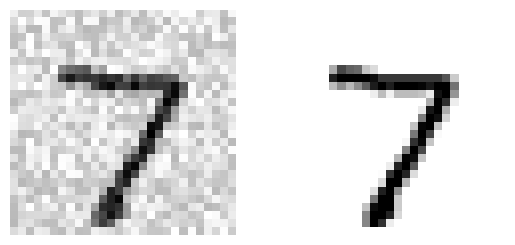

In [111]:

plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
plt.show()

On the left above is the noisy input image, and on the right is the clean target image.


Now let’s train the classifier and make it clean up this image.

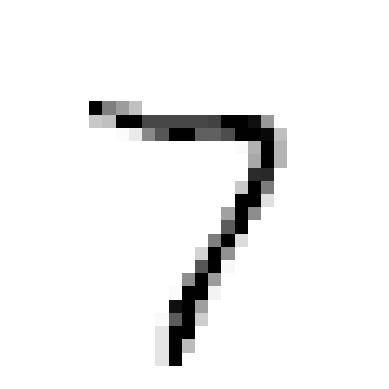

In [112]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])

plot_digit(clean_digit)
plt.show()

Looks close enough to the target! This concludes our tour of classification.

This is the end, now I know how to select good metrics for classification tasks, pick the
appropriate precision/recall trade-off, compare classifiers, and more generally
build good classification systems for a variety of tasks.

Congrats to me 🎉🥳